Making an image

In [153]:
from math import floor
import numpy as np
import cv2
import matplotlib.pyplot as plt


Importing the image

Tuncating the image to make it Square

Heat map of array

In [154]:
def makeimagecode(image_name,code_length=16):
    # read image
    image = cv2.imread(image_name, 0)

    # resize image
    truncsize = min(image.shape[0], image.shape[1])
    istartvert = (len(image) - truncsize) / 2
    iendvert = istartvert + truncsize
    istarthor = (len(image[0]) - truncsize) / 2
    iendhor = istarthor + truncsize
    resized_image = image[int(istartvert):int(iendvert), int(istarthor):int(iendhor)]

    #initialize the compressed image
    image_compressed = np.zeros((code_length,code_length))

    #side length of each block
    length_cop_block = floor(truncsize/code_length)

    #number of elements in each block
    element = length_cop_block*length_cop_block

    #compress the image
    for i in range(code_length):
        start_value_vert = length_cop_block*i
        end_value_vert = length_cop_block*(i+1)
        for j in range(code_length):
            start_value_hor = length_cop_block*j
            end_value_hor = length_cop_block*(j+1)
            num_full = 0
            for k in range(start_value_vert,end_value_vert):
                for l in range(start_value_hor,end_value_hor):
                    if resized_image[l][k] <= 50:
                        num_full = num_full + 1
            if num_full > element/4:
                image_compressed[j][i] = 0
            else:
                image_compressed[j][i] = 1

    #plot the compressed image
    plt.imshow(image_compressed, cmap='hot')
    plt.colorbar()
    plt.show() 
    
    #coverting to 1d array         
    image_compressed_code = image_compressed.flatten()
    return image_compressed_code
     

    

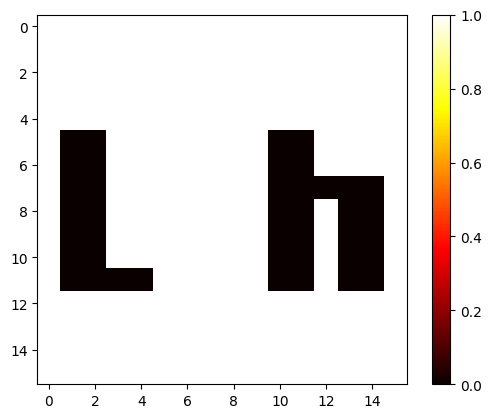

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


: 

In [155]:
from turtle import width
import numpy as np


print(makeimagecode('LH.png'));